In [40]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
from datetime import datetime, timedelta

In [4]:
df_stock=yf.download("TSLA",period="1y")

[*********************100%***********************]  1 of 1 completed


In [6]:
df_stock.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-04,579.710022,600.609985,577.200012,599.049988,599.049988,24036900
2021-06-07,591.830017,610.000000,582.880005,605.130005,605.130005,22543700
2021-06-08,623.010010,623.090027,595.500000,603.590027,603.590027,26053400
2021-06-09,602.169983,611.789978,597.630005,598.780029,598.780029,16584600
2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600


In [8]:
df_stock["Close"]

Date
2021-06-04    599.049988
2021-06-07    605.130005
2021-06-08    603.590027
2021-06-09    598.780029
2021-06-10    610.119995
                 ...    
2022-05-27    759.630005
2022-05-31    758.260010
2022-06-01    740.369995
2022-06-02    775.000000
2022-06-03    703.549988
Name: Close, Length: 253, dtype: float64

In [11]:
df_stock.column=["Close"]

In [12]:
df_stock.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-27,723.250000,759.799988,720.530029,759.630005,759.630005,29765000
2022-05-31,773.840027,778.799988,734.229980,758.260010,758.260010,33971500
2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300
2022-06-02,732.469971,792.630005,726.200012,775.000000,775.000000,31157700
2022-06-03,729.679993,743.390015,700.250000,703.549988,703.549988,37348100


<AxesSubplot:xlabel='Date'>

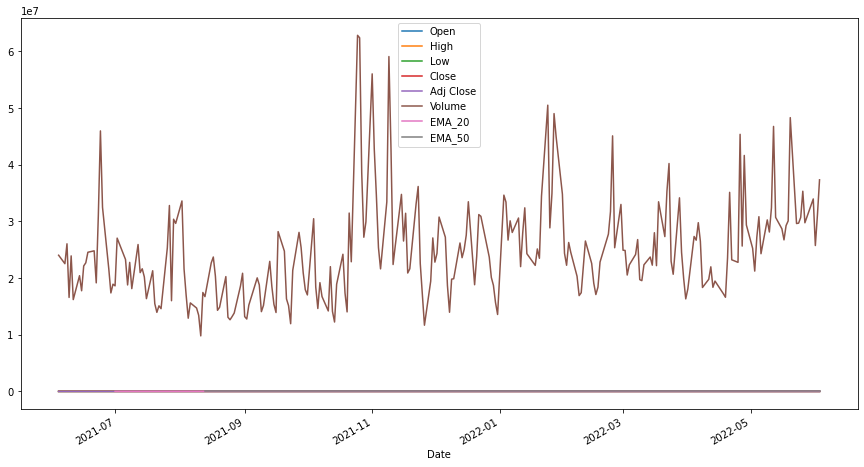

In [45]:
df_stock.plot(figsize=(15,8))

# CALCULATION MOVING AVERAGE 

In [24]:
df_stock["EMA_20"]=df_stock["Close"].rolling(20).mean()
df_stock["EMA_50"]=df_stock["Close"].rolling(50).mean()

In [26]:
df_stock.head(5)

,Open,High,Low,Close,Adj Close,Volume,EMA_20,EMA_50
Date,,,,,,,,
2021-06-04,579.710022,600.609985,577.200012,599.049988,599.049988,24036900,NaN,NaN
2021-06-07,591.830017,610.000000,582.880005,605.130005,605.130005,22543700,NaN,NaN
2021-06-08,623.010010,623.090027,595.500000,603.590027,603.590027,26053400,NaN,NaN
2021-06-09,602.169983,611.789978,597.630005,598.780029,598.780029,16584600,NaN,NaN
2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600,NaN,NaN


In [59]:
def MovingAverage(data,period):
    return pd.series(data).rolling(window=50).mean()

In [60]:
df_stock["EMA_100"]=MovingAverage(df_stock["Close"],100)
df_stock


AttributeError: module 'pandas' has no attribute 'series'

In [53]:
df_stock.dropna(inplace=True)

In [54]:
df_stock

,Open,High,Low,Close,Adj Close,Volume,EMA_20,EMA_50
Date,,,,,,,,
2021-08-13,723.710022,729.900024,714.340027,717.169983,717.169983,16731500,684.181494,658.944999
2021-08-16,705.070007,709.500000,676.400024,686.169983,686.169983,22677400,686.178995,660.687399
2021-08-17,672.659973,674.580017,648.840027,665.710022,665.710022,23721300,686.439496,661.898999
2021-08-18,669.750000,695.770020,669.349976,688.989990,688.989990,20349400,688.124496,663.606998
2021-08-19,678.210022,686.549988,667.590027,673.469971,673.469971,14313500,689.334995,665.100797
...,...,...,...,...,...,...,...,...
2022-05-27,723.250000,759.799988,720.530029,759.630005,759.630005,29765000,766.040500,909.515197
2022-05-31,773.840027,778.799988,734.229980,758.260010,758.260010,33971500,758.806500,906.572596
2022-06-01,755.159973,771.979980,730.919983,740.369995,740.369995,25749300,750.362500,902.956797


In [58]:
df_stock.rolling(20).min().head()

,Open,High,Low,Close,Adj Close,Volume,EMA_20,EMA_50
Date,,,,,,,,
2021-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
